In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
food = pd.read_csv("food.csv")
food.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


In [3]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,User_ID,Food_ID,Rating
0,1.0,88.0,4.0
1,1.0,46.0,3.0
2,1.0,24.0,5.0
3,1.0,25.0,4.0
4,2.0,49.0,1.0


In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   309 non-null    int64 
 1   Name      309 non-null    object
 2   C_Type    309 non-null    object
 3   Veg_Non   309 non-null    object
 4   Describe  309 non-null    object
dtypes: int64(1), object(4)
memory usage: 12.2+ KB


In [5]:
food.Food_ID.count()

309

In [6]:
food.Veg_Non.value_counts()

veg        195
non-veg    114
Name: Veg_Non, dtype: int64

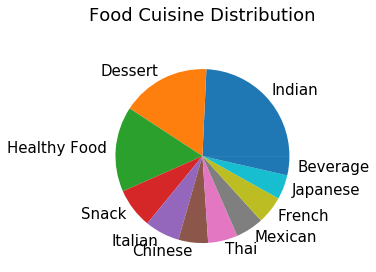

In [7]:
plt.rc("font", size=15)
food.C_Type.value_counts(sort=True).plot(kind='pie')
plt.title('Food Cuisine Distribution\n')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
plt.show()

In [8]:
ratings.Rating.unique()

array([ 4.,  3.,  5.,  1.,  8.,  9., 10.,  6.,  2.,  7., nan])

In [9]:
len(ratings)

512

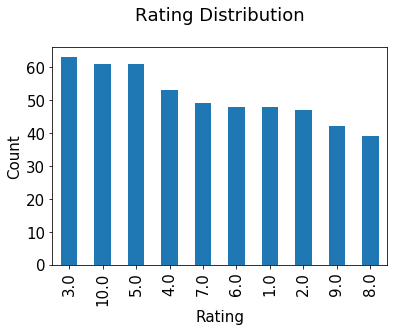

In [10]:
plt.rc("font", size=15)
ratings.Rating.value_counts(sort=True).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [11]:
combined = pd.merge(ratings, food, on='Food_ID')
combined.head()

,User_ID,Food_ID,Rating,Name,C_Type,Veg_Non,Describe
0,1.0,88.0,4.0,peri peri chicken satay,Snack,non-veg,"boneless skinless chicken thigh (trimmed), sal..."
1,1.0,46.0,3.0,steam bunny chicken bao,Japanese,non-veg,"buns, all purpose white flour, dry yeast, suga..."
2,3.0,46.0,2.0,steam bunny chicken bao,Japanese,non-veg,"buns, all purpose white flour, dry yeast, suga..."
3,20.0,46.0,6.0,steam bunny chicken bao,Japanese,non-veg,"buns, all purpose white flour, dry yeast, suga..."
4,69.0,46.0,9.0,steam bunny chicken bao,Japanese,non-veg,"buns, all purpose white flour, dry yeast, suga..."


In [12]:
dataset = ratings.pivot_table(index='Food_ID',columns='User_ID',values='Rating')
dataset.fillna(0,inplace=True)

In [13]:
dataset.head()

User_ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
Food_ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0


## KNN

In [14]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

csr_dataset = csr_matrix(dataset.values)
dataset.reset_index(inplace=True)

knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn_model.fit(csr_dataset)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [17]:
def food_recommendation(Food_Name):
    n = 10
    FoodList = food[food['Name'].str.contains(Food_Name)]  
    if len(FoodList):        
        Foodi= FoodList.iloc[0]['Food_ID']
        Foodi = dataset[dataset['Food_ID'] == Foodi].index[0]
        distances , indices = knn_model.kneighbors(csr_dataset[Foodi],n_neighbors=n+1)    
        Food_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])
#         Food_indices = list(zip(indices.squeeze().tolist(),distances.squeeze().tolist()))[:0:-1]
        Recommendations = []
        print(Food_indices)
        print(distances)
        for val in Food_indices:
            if(val[1]==0.0):
                continue
            Foodi = dataset.iloc[val[0]]['Food_ID']
            i = food[food['Food_ID'] == Foodi].index
            print()
#             print('Food_id:',Foodi,' Name:',food.iloc[i]['Name'].values[0],'with a distance of',val[1])
            Recommendations.append({'Food_id':Foodi,'Name':food.iloc[i]['Name'].values[0],'Distance':val[1]})
        df = pd.DataFrame(Recommendations,index=range(1,n+1))
        return df
    else:
        return "No Similar Foods."

In [19]:
food_recommendation('chicken biryani')

[(90, 0.0), (181, 0.07152330911474059), (59, 0.07152330911474059), (179, 0.07152330911474059), (243, 0.32624614231431726), (183, 0.5904222163527308), (262, 0.6286093236458963), (38, 0.6286093236458963), (308, 0.6286093236458963), (289, 0.6286093236458963), (93, 0.6286093236458963)]
[[0.         0.07152331 0.07152331 0.07152331 0.32624614 0.59042222
  0.62860932 0.62860932 0.62860932 0.62860932 0.62860932]]












,Food_id,Name,Distance
1,182.0,avial with red rice,0.071523
2,60.0,caramelized sesame smoked almonds,0.071523
3,180.0,lotus leaf wrapped fried rice,0.071523
4,244.0,jalebi with fennel yogurt pudding,0.326246
5,184.0,vegetable bruschetta,0.590422
6,263.0,holi special bhang pakode,0.628609
7,39.0,sweet potato and quinoa bowl,0.628609
8,309.0,puffed rice,0.628609
9,290.0,butter chicken,0.628609
10,94.0,chicken sukka,0.628609


In [20]:
import pickle
pickle.dump(knn_model, open('knn_model.pkl','wb'))

## SVD 

In [21]:
dataset_2 = ratings.pivot_table(index='User_ID',columns='Food_ID',values='Rating')
dataset_2.fillna(0,inplace=True)
dataset_2.head()

Food_ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0
User_ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
R = dataset_2.values
user_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)
Ratings_demeaned

array([[-0.05177994, -0.05177994, -0.05177994, ..., -0.05177994,
        -0.05177994, -0.05177994],
       [-0.08414239, -0.08414239, -0.08414239, ..., -0.08414239,
        -0.08414239, -0.08414239],
       [-0.15533981, -0.15533981, -0.15533981, ..., -0.15533981,
        -0.15533981, -0.15533981],
       ...,
       [-0.09708738, -0.09708738, -0.09708738, ..., -0.09708738,
        -0.09708738, -0.09708738],
       [-0.09061489, -0.09061489, -0.09061489, ..., -0.09061489,
        -0.09061489, -0.09061489],
       [-0.08737864, -0.08737864, -0.08737864, ..., -0.08737864,
        -0.08737864, -0.08737864]])

In [23]:
n_users = ratings.User_ID.unique().shape[0]
n_food = ratings.Food_ID.unique().shape[0]
print('Number of users = '+str(n_users)+' | Number of food_items = '+str(n_food))

Number of users = 101 | Number of food_items = 310


In [24]:
sparsity = round(1.0 - len(ratings) / float(n_users * n_food), 3)
print('The sparsity level of dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of dataset is 98.4%


In [25]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [26]:
sigma = np.diag(sigma)

In [27]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [28]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = dataset_2.columns)
preds.head()

Food_ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0
0,-0.048949,0.002101,0.011330,-0.077076,0.020332,-0.028672,-0.098129,-0.171783,-0.124071,-0.043170,...,-0.014799,0.060264,0.024905,0.073726,0.022573,-0.011967,0.087599,0.014540,0.252929,0.022718
1,-0.186800,-0.007912,-0.042540,-0.898963,-0.084581,-0.028339,-0.150486,-0.101445,-0.115920,-0.108364,...,0.062862,0.079658,0.050724,0.103593,0.065283,-0.166912,-0.039653,0.047565,0.030345,0.012797
2,-0.032185,0.019317,-0.108391,-0.063803,-0.080629,-0.027423,-0.091557,-0.053898,-0.083616,-0.091422,...,-0.020945,0.053987,0.057926,0.040231,0.067101,-0.134565,0.029937,0.059610,0.050380,-0.049891
3,-0.350374,-0.172312,-0.078371,-0.109807,-0.039780,-0.024423,-0.225578,-0.011290,-0.251320,-0.117247,...,0.175080,0.113178,0.057976,0.132643,0.135032,-0.304662,0.056973,0.082878,0.155382,-0.023058
4,-0.024147,0.001343,-0.230989,0.056057,-0.082824,-0.038933,-0.069143,6.120407,-0.082034,-0.247019,...,0.095883,0.056805,0.067464,0.031411,0.040180,-0.135914,0.044329,0.039137,0.075536,-0.045251


In [29]:
def recommend_food(predictions, userID, food, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the food information.
    user_data = original_ratings[original_ratings.User_ID == (userID)]
    user_full = (user_data.merge(food, how = 'left', left_on = 'Food_ID', right_on = 'Food_ID').
                     sort_values(['Rating'], ascending=False)
                 )

    print('User {0} has already rated {1} food.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings food not already rated.'.format(num_recommendations))
    display(user_full)
    display(pd.DataFrame(sorted_user_predictions).reset_index())
    
     # Recommend the highest predicted rating foods that the user hasn't tasted yet.
    recommendations = (food[~food['Food_ID'].isin(user_full['Food_ID'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'Food_ID',
               right_on = 'Food_ID').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations
   

In [30]:
already_rated, predictions = recommend_food(preds, 4, food, ratings, 10)

User 4 has already rated 6 food.
Recommending highest 10 predicted ratings food not already rated.


,User_ID,Food_ID,Rating,Name,C_Type,Veg_Non,Describe
3,4.0,212.0,10.0,al hachi chicken,Indian,non-veg,"shallow fried chicken, bottle gourd (boiled an..."
4,4.0,128.0,6.0,thai lamb balls,Thai,non-veg,"lamb (minced), couscous, scallion, garlic, egg..."
0,4.0,14.0,5.0,"peach, raspberry and nuts smoothie",Healthy Food,veg,"fresh raspberries, ripe banana, almond, fresh ..."
1,4.0,141.0,5.0,"risotto lobster with parmesan egg pancake, con...",Italian,non-veg,"lobster shell, carrot, leeks, garlic cloves, t..."
2,4.0,170.0,1.0,fried rice with soya chunks,Chinese,veg,"basmati rice, carrot, capsicum, beans, green p..."
5,4.0,21.0,1.0,apple rabdi,Dessert,veg,"apples, milk, sugar, green cardamoms, almonds ..."


,Food_ID,3
0,212.0,9.509673
1,128.0,5.676348
2,14.0,4.737564
3,141.0,4.737564
4,170.0,1.051432
...,...,...
304,47.0,-0.422146
305,15.0,-0.454916
306,172.0,-0.471280
307,119.0,-0.471280


In [31]:
# Top 5 food that User 1310 has rated 
already_rated.head(5)

,User_ID,Food_ID,Rating,Name,C_Type,Veg_Non,Describe
3,4.0,212.0,10.0,al hachi chicken,Indian,non-veg,"shallow fried chicken, bottle gourd (boiled an..."
4,4.0,128.0,6.0,thai lamb balls,Thai,non-veg,"lamb (minced), couscous, scallion, garlic, egg..."
0,4.0,14.0,5.0,"peach, raspberry and nuts smoothie",Healthy Food,veg,"fresh raspberries, ripe banana, almond, fresh ..."
1,4.0,141.0,5.0,"risotto lobster with parmesan egg pancake, con...",Italian,non-veg,"lobster shell, carrot, leeks, garlic cloves, t..."
2,4.0,170.0,1.0,fried rice with soya chunks,Chinese,veg,"basmati rice, carrot, capsicum, beans, green p..."


In [32]:
# Top 10 food that User 4 hopefully will enjoy
predictions

,Food_ID,Name,C_Type,Veg_Non,Describe
150,155,chilli fish,Chinese,non-veg,"For fish pieces (Boneless), Flour, Cornflour, ..."
58,61,crunchy vegetable dal sattu croquettes,Italian,veg,"red lentils or masoor dal (half-boiled), potat..."
93,96,methi chicken masala,Indian,non-veg,"boneless chicken, lemon juice, red chilli powd..."
180,186,strawberry & pistachio breton tart,Dessert,veg,"plain flour, baking powder, sea salt, unsalted..."
124,127,cajun spiced turkey wrapped with bacon,Mexican,non-veg,"turkey breast, cajun spice, spinach leaves (co..."
42,45,ghee roast chicken dosa quesadilla,Mexican,non-veg,"dry red chillies, coriander seeds, cumin seeds..."
262,269,spiced orange valencia cake,Dessert,veg,"egg whites, egg white powder, sugar, almond po..."
60,63,flax seed and beetroot modak,Japanese,veg,"rice flour, salt, oil (for greasing), beetroot..."
146,151,fish andlouse,French,non-veg,"white wine and water mix to cover, onion, salt..."
71,74,slow cooked spiced sangria,Mexican,veg,"red wine (merlot / zinfandel), apple cider, ho..."


### SVD Evluation

In [33]:
from surprise import Reader, SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Use the famous SVD algorithm
reader = Reader()
data_eval = Dataset.load_from_df(ratings[['User_ID', 'Food_ID', 'Rating']], reader)
algo = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(algo, data_eval, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    nan     2.9511  2.6439  3.1638  2.7243  nan     nan     
MAE (testset)     nan     2.5534  2.1471  2.7157  2.2843  nan     nan     
Fit time          0.02    0.02    0.02    0.02    0.02    0.02    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([       nan, 2.95105708, 2.64389789, 3.16382742, 2.72425561]),
 'test_mae': array([       nan, 2.55339806, 2.14705882, 2.71568627, 2.28431373]),
 'fit_time': (0.02400350570678711,
  0.023999929428100586,
  0.02399587631225586,
  0.02400374412536621,
  0.02399420738220215),
 'test_time': (0.0, 0.0, 0.0, 0.0, 0.0)}

In [34]:
trainset = data_eval.build_full_trainset()
algo.fit(trainset)

In [35]:
algo.predict(1, 244, 3)

Prediction(uid=1, iid=244, r_ui=3, est=5, details={'was_impossible': False})